<font size=20>Classification tree</font>

Supervised learning involves building a model using labeled data, where inputs have known corresponding outputs. The model learns by comparing its predictions to the correct outputs, adjusting weights and biases. During training, the model is created. Testing evaluates its ability to generalize to new data by comparing predictions to actual values, aiming to minimize errors for both training and test data to achieve high generalization.

Decision tree algorithm is a popular **supervised machine learning technique** that uses decision models resembling trees, as their name suggests. This tree form tries to classify the data according to a separation rule. Also referred to as ***CART*** (Classification and Regression Trees) to emphasize their dual use, depending on the type of variable they predict (**categorical or numerical**). In our case, we are dealing with a multiclass categorical target variable (diagnosis), so we use a classification decision tree.

**Advantages**:

Visualization and Interpretation: Decision trees are easy to understand and visualize.

Non-Parametric: They don't require assumptions about data distribution.

No Data Prep: No need for data normalization or scaling.

Handling Missing Values: Can handle missing data.

Capture Non-Linear Patterns: Suitable for modeling non-linear relationships.

**Disadvantages**:

Instability: Small data changes can alter the tree structure.

Not Ideal for Big Data: Less efficient on large datasets, prone to overfitting.

Overfitting: Training error decreases as the tree grows, but testing error may increase. Requires hyperparameter tuning and pruning to mitigate.

In [1]:
# Importing the necessary packages and libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro

In [2]:
# Loading data from excel.

ded=pd.read_excel('CogTEL_new.xlsx')

In [3]:
# Convert object variables to floats and replace '-' with NaN. 
# We need that kind of transformation in order to to handle such variables in Python.

ded['education']=pd.to_numeric(ded['education'],errors='coerce')
ded['GDS_6']=pd.to_numeric(ded['GDS_6'],errors='coerce')
ded['GDS_8']=pd.to_numeric(ded['GDS_8'],errors='coerce')
ded['GDS_9']=pd.to_numeric(ded['GDS_9'],errors='coerce')
ded['NPIJ32F']=pd.to_numeric(ded['NPIJ32F'],errors='coerce')

In [4]:
# Rename the following columns for potential selection in subsequent analysis steps (optional, but acceptable...).

ded = ded.rename(columns={'Antidepressants ': 'Antidepressants' })
ded = ded.rename(columns={'Concentration/attention' : 'Concentration_attention'})

In [5]:
# Displaying the entire dataset.

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [6]:
# Removing instances (rows/examples/patients) having missing values.

ded=ded.dropna()

In [7]:
# Removing patients under the age of 50, or equivalently, keeping those who are 50 and older.

dedomena=ded[ded['Age']>49]

In [8]:
dedomena.shape

(504, 61)

In [9]:
# Assigning the set of independent variables and the target variable to X and Y respectively.

X=dedomena.drop('diagnosis',axis=1)
Y=dedomena.diagnosis

<font color='green'><font size=8> Imbalance problem</font></font>

### Regarding the issue of imbalance, there is an inhomogeneity in the dataset concerning the classes predicted by the target variable. Specifically, there is a significant disparity in the number of observations belonging to classes "0" and "1" as compared to classes "2" and "3". By utilizing the SMOTE method, we aim to generate suitable samples for the minority classes to address the problem of the unequal distribution of observations.

Class=0, n=208 (41.270%)
Class=2, n=79 (15.675%)
Class=1, n=173 (34.325%)
Class=3, n=44 (8.730%)


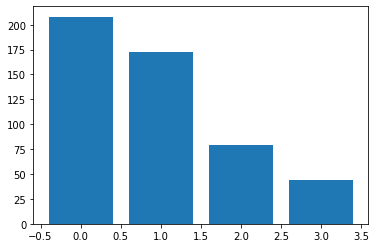

In [10]:
# Displaying the count of instances per predicted class.

from collections import Counter
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution

plt.bar(counter.keys(), counter.values())
plt.show()


In [11]:
!pip install imblearn
!pip install imbalanced-learn

Class=0, n=208 (25.000%)
Class=2, n=208 (25.000%)
Class=1, n=208 (25.000%)
Class=3, n=208 (25.000%)


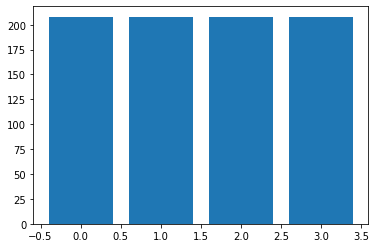

In [12]:
# SMOTE: Synthetic Minority Oversampling Technique.

from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE(random_state=7)
X, Y = oversample.fit_resample(X, Y)

# Summarize distribution.

counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# Plot the distribution.

plt.bar(counter.keys(), counter.values())
plt.show()


<font color='purple'><font size=8>Cross validation</font></font>

## is a technique used to find the optimal learning algorithm that can make accurate predictions and generalize well to unseen data. It involves determining the best way to divide the dataset into subsets for training and evaluation purposes.
The simplest approach, as illustrated in the figure below, involves three key sets in every machine learning algorithm:

Train set: Configured for learning and parameter estimation.

Validation set: Used for tuning hyperparameters, assessing predictive ability, and aiding in data preparation and feature selection. Validation is performed within the training set.

Test set: Provides an unbiased assessment of the final model's predictability for comparing and choosing between models.

In summary, model generation occurs through the training set, while performance evaluation is split between the validation and test sets. However, this division reduces the training data and can introduce randomness in set selection. An alternative to this is cross-validation (CV), which involves multiple rounds of sampling from the existing dataset, using different subsets each time.

Two common methods of cv are:

### 1. hold-out cv

This is one of the simplest data splitting methods, typically using an 80% training and 20% testing (or 90% and 10%) ratio. It's well-suited for large datasets, as it involves just one data split. This provides sample data for both training and testing the model's validity. However, it's important to note that this method may struggle with heterogeneous datasets, where sample independence in the selection of training and test sets is crucial. Another limitation is its inability to fine-tune hyperparameters, which can be addressed by employing a separate validation set. Yet, more flexible and reliable methods like nested cross-validation (nested CV) exist.

### 2. k-fold cv

K-fold cross-validation is a widely used method for model tuning and comparison. It involves dividing the original dataset into k subsets. Starting with the first subset (k=1) as the test set, the remaining k-1 subsets are used for training. The model's performance is evaluated on this test set, and the result is recorded. Repeating this process k times yields k independent models, each with its estimate (score) of model effectiveness. The final model score is obtained by calculating the average of these scores. This method allows for model comparison, helping us choose the one with the highest success rate.

The advantage of k-fold cross-validation is that it uses different subsets of the original data for both training and testing, providing better supervision for model evaluation. Choosing an appropriate value for k is essential. Larger k values generally lead to higher accuracy, but they come with increased time and computational costs. Additionally, for large k values, the original dataset must be sufficiently large to ensure the test set's size is suitable for model evaluation.

### 3. nested cv

Cross-validation (CV) is a method used for hyperparameter tuning and model comparison. One simple approach is to divide the data into three parts: a training set, a validation set, and a test set (figure below). The model is trained on the training set with various hyperparameter values, validated on the validation set, and its final performance is assessed on the test set. However, this method may not account for variability in the validation process and doesn't guarantee optimal hyperparameters.

Another common strategy is to use a hold-out method to create a test set and apply a different CV method to optimize hyperparameters on the training set. However, this approach provides only one test set, which can limit model evaluation.

A less favorable method, known as non-nested cross-validation, performs both validation and model evaluation on the same test set. This approach can introduce bias due to hyperparameter tuning.

#### To address these issues, nested k-fold cross-validation is used, involving two loops: an inner loop for hyperparameter tuning and an outer loop for comparing models with optimal hyperparameters. This method is computationally expensive, but it offers protection against overfitting and takes into account variability in both the test and validation sets.

In conclusion, CV determines the model with the highest predictive ability. It's essential when dealing with dependent data or small sample sizes. CV methods provide a comprehensive estimate of model performance, which depends on the number of iterations in k-fold or repeated k-fold. Finally, the optimal model is selected for predictions on new data after thorough evaluation with resampling methods.

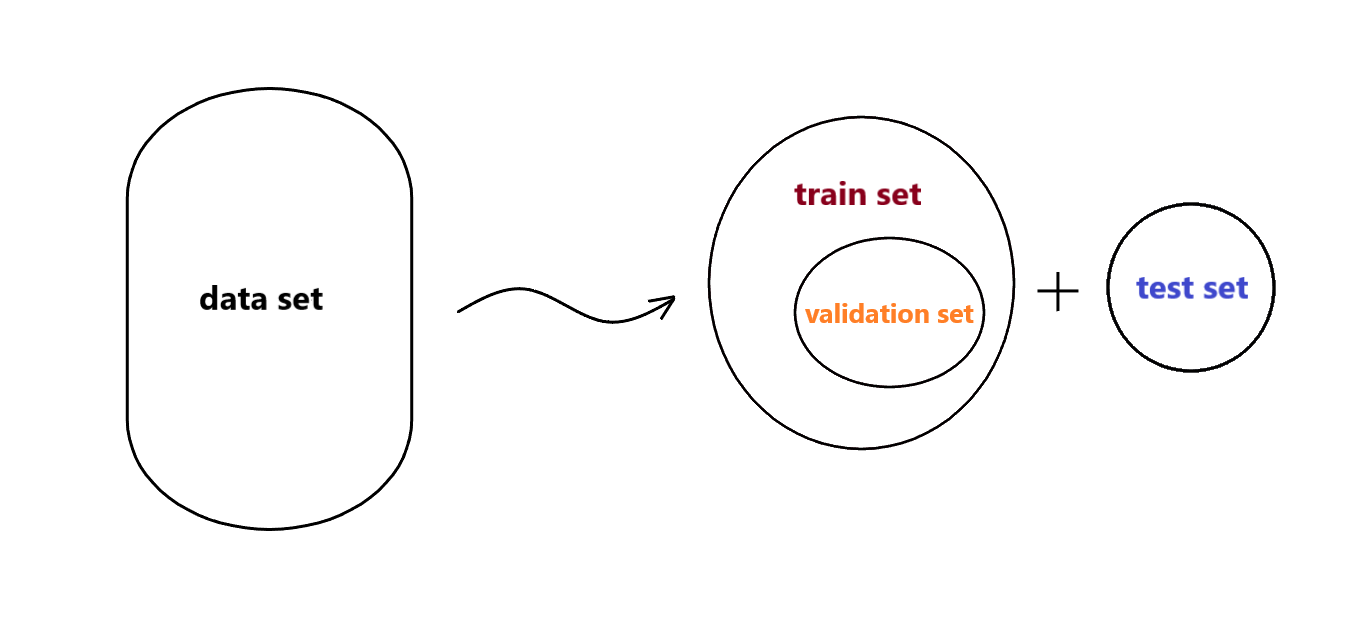

# Training and testing a classification decision tree with a hold-out cross-validation method while making it unpruned (worst case).

In [13]:
# Splitting dataset into training and test sets (hold-out cv).

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [18]:
# We train a classification tree with complexity parameter a=0 (default), which means no pruning.
# The DecisionTreeClassifier function automatically handles multi-class problems.

clf = DecisionTreeClassifier(ccp_alpha=0.0,random_state=34)
clf=clf.fit(X_train,Y_train)

[Text(0.5863447867298578, 0.9615384615384616, 'X[19] <= 3.988\ngini = 0.749\nsamples = 582\nvalue = [139, 139, 142, 162]'),
 Text(0.27636255924170616, 0.8846153846153846, 'X[28] <= 4.976\ngini = 0.675\nsamples = 400\nvalue = [14, 92, 140, 154]'),
 Text(0.10426540284360189, 0.8076923076923077, 'X[45] <= 1.252\ngini = 0.372\nsamples = 125\nvalue = [0, 5, 96, 24]'),
 Text(0.07582938388625593, 0.7307692307692307, 'X[55] <= 4.5\ngini = 0.226\nsamples = 96\nvalue = [0, 4, 84, 8]'),
 Text(0.06635071090047394, 0.6538461538461539, 'X[49] <= 1.29\ngini = 0.177\nsamples = 93\nvalue = [0, 1, 84, 8]'),
 Text(0.04739336492890995, 0.5769230769230769, 'X[12] <= 0.03\ngini = 0.114\nsamples = 83\nvalue = [0, 1, 78, 4]'),
 Text(0.037914691943127965, 0.5, 'X[48] <= 0.5\ngini = 0.333\nsamples = 25\nvalue = [0, 1, 20, 4]'),
 Text(0.02843601895734597, 0.4230769230769231, 'X[8] <= 0.576\ngini = 0.169\nsamples = 22\nvalue = [0, 1, 20, 1]'),
 Text(0.018957345971563982, 0.34615384615384615, 'X[57] <= 16.5\ngini 

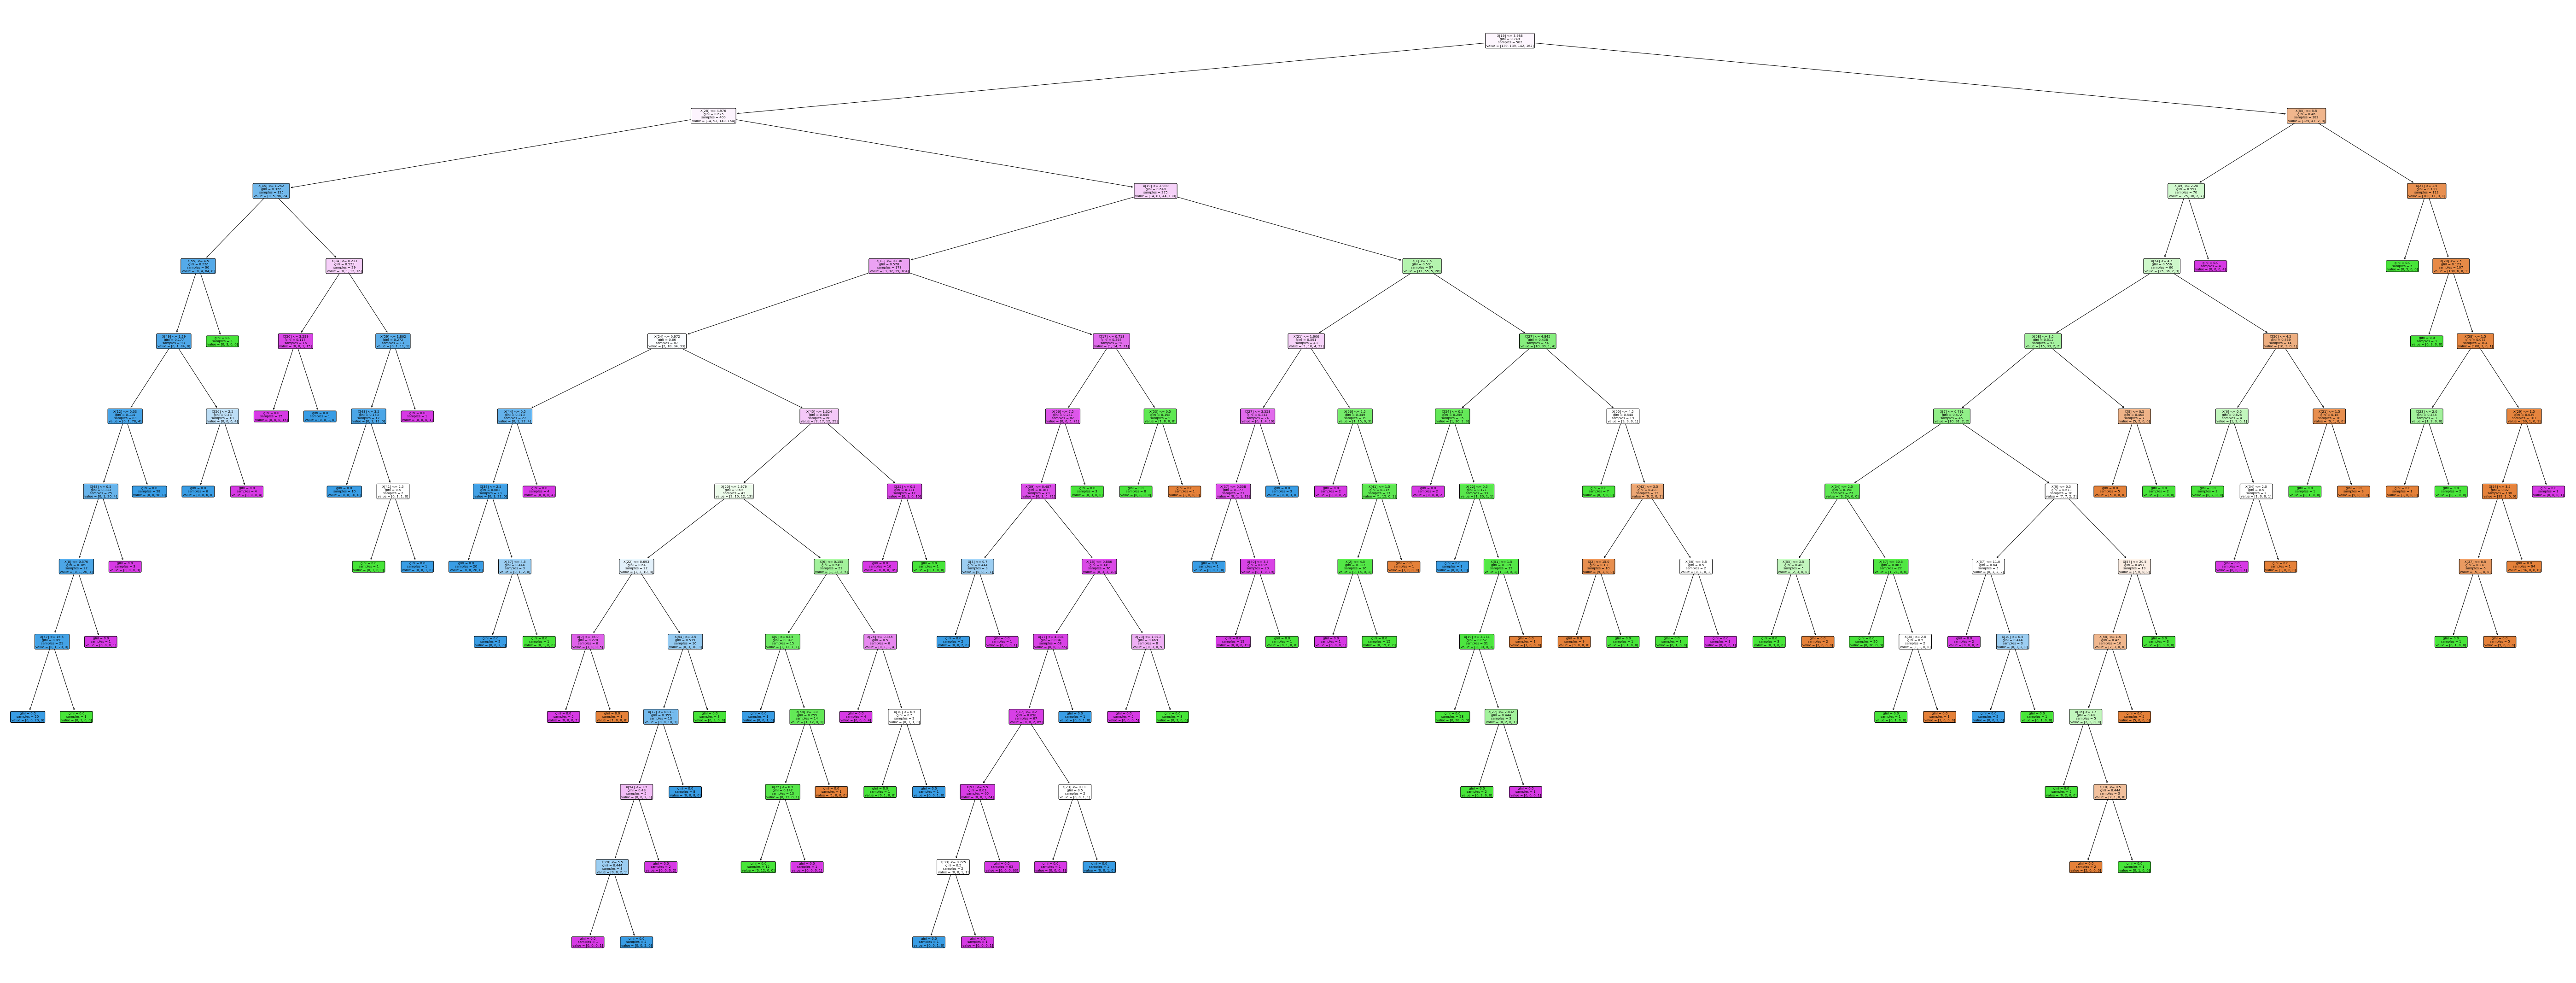

In [19]:
# Showing the fully developed decision tree.

plt.figure(figsize=(100,39))
plot_tree(clf,filled=True,
         rounded=True)

In [20]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 34,
 'splitter': 'best'}

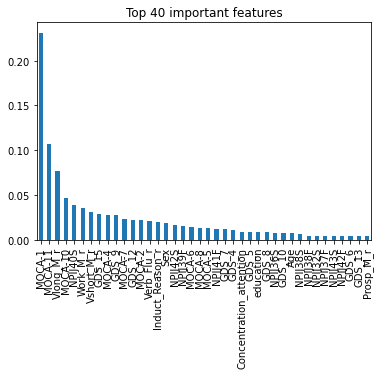

In [21]:
# Feature importance.

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')
plt.title("Top 40 important features")
plt.show()

In [22]:
# Showing the Y values (the predictions) according the X values.

predictions=clf.predict(X_test)
predictions

array([0, 0, 1, 1, 2, 0, 1, 2, 2, 3, 3, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 3, 0, 0, 0, 1, 3, 1, 3, 0,
       0, 1, 3, 1, 3, 0, 3, 1, 3, 3, 1, 1, 3, 1, 0, 3, 1, 0, 3, 1, 2, 0,
       1, 0, 2, 0, 2, 1, 2, 2, 0, 3, 3, 2, 1, 1, 3, 3, 1, 2, 2, 3, 3, 1,
       1, 1, 0, 1, 3, 1, 2, 3, 1, 1, 0, 0, 1, 1, 1, 0, 1, 3, 1, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 1, 0, 0, 2,
       1, 1, 1, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 1, 2, 2, 1, 1, 1, 3, 2, 1,
       1, 3, 3, 1, 0, 3, 0, 3, 0, 2, 3, 1, 1, 2, 3, 0, 1, 0, 3, 2, 2, 2,
       2, 3, 0, 1, 0, 2, 1, 2, 3, 1, 0, 0, 1, 3, 0, 0, 2, 3, 3, 1, 0, 3,
       3, 0, 3, 2, 0, 3, 0, 1, 1, 2, 0, 2, 1, 3, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 0, 1, 1, 3, 3, 2, 2, 0, 1, 1, 3, 3, 0, 3, 0, 1, 1, 2, 1, 0, 0,
       2, 3, 2, 1, 0, 0, 3, 3], dtype=int64)

In [23]:
# Accuracy metric (1st method)
# Testing how well the model predicts according with the test set.
# Y_test is the exact response values of the test set, and we want to check if they match with those predicted by the model.
# Too low score, possible overfitting to training data.

from sklearn.metrics import accuracy_score

accuracy_score(Y_test,predictions)

0.692

In [24]:
# Accuracy metric (2st method).

clf.score(X_test,Y_test)

0.692

<font color='red'><font size=8>Overfitting</font></font>

is a common issue that arises in the context of complex models when there is a scarcity of training examples relative to the numerous features. In such situations, the classifier's accuracy can exhibit significant discrepancies between the training data and various testing datasets used for validation. Overfitting is associated with a high degree of variance and indicates that the model is excessively focused on the training data, resulting in poor predictive performance on unseen testing data. To mitigate overfitting, one can either leverage a larger volume of data or simplify the model by reducing its dimensions, thus enhancing its ability to generalize. It's worth noting that models that are overly constrained as well as those that are overly flexible, are susceptible to overfitting and should be avoided.

## In summary, overfitting occurs when the classifier essentially memorizes the training set's outcomes rather than learning from them.

In [25]:
# Overfitting!

clf.score(X_train,Y_train)

1.0

In [26]:
# Overall metrics.

from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73        69
           1       0.57      0.64      0.60        69
           2       0.81      0.71      0.76        66
           3       0.64      0.76      0.69        46

    accuracy                           0.69       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.70      0.69      0.70       250



In [27]:
# Metrics such as Precision, Recall and F1 they are not done like with Accuracy due to multiclass target!!!!

from sklearn.metrics import f1_score

f1_score(Y_test,predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Search for the optimal value of the hyperparameter alpha with the aim of increasing the performance (1st and 2nd way)

# 1st way

In [28]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [29]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1411831902819256


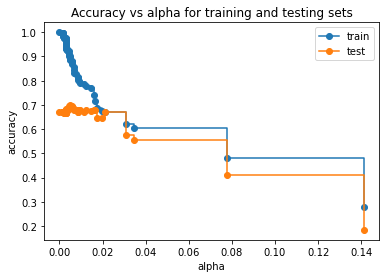

In [30]:
# Using the graph we can determine (approximately) the value of the complexity parameter alpha that optimizes the accuracy in the test set.
# Mind that we use the same training and test sets each time (in the 2nd way the whole original data set will be used).

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
# For α=0.018 retrain and check if performance increased on test set.
# We choose α as the measure for pruning the tree.

clf=DecisionTreeClassifier(ccp_alpha=0.018,random_state=23)
clf=clf.fit(X_train,Y_train)

In [34]:
predictions=clf.predict(X_test)
predictions

array([1, 0, 0, 1, 2, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1,
       0, 1, 3, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 3, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 3, 1, 0, 3, 1, 0, 3, 2, 2, 0,
       0, 0, 2, 1, 2, 1, 3, 2, 0, 2, 3, 2, 1, 1, 3, 2, 3, 3, 2, 2, 3, 1,
       1, 0, 0, 1, 2, 2, 2, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 0, 1, 2, 2,
       1, 3, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2,
       2, 3, 0, 1, 0, 2, 0, 2, 3, 1, 0, 0, 1, 3, 0, 0, 2, 2, 2, 1, 0, 1,
       2, 0, 3, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 3, 0, 3, 0, 1, 0, 2, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 1, 2], dtype=int64)

In [35]:
# Accuracy when checking on the test set (2nd way).
# Worse than previous unpruned tree, but we prefer this model because at least it is not overtrained (overfitted).

clf.score(X_test,Y_test)

0.648

In [36]:
# Not overfitting. That's good.

clf.score(X_train,Y_train)

0.6872852233676976

In [37]:
# Summarize all metrics
# The weighted metric is of no interest as it concerns unequal datasets.

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78        69
           1       0.57      0.67      0.61        69
           2       0.61      0.80      0.69        66
           3       0.54      0.30      0.39        46

    accuracy                           0.65       250
   macro avg       0.65      0.62      0.62       250
weighted avg       0.66      0.65      0.64       250



In [38]:
cm = confusion_matrix(Y_test,predictions)
cm

array([[49, 20,  0,  0],
       [ 6, 46, 10,  7],
       [ 0,  8, 53,  5],
       [ 1,  7, 24, 14]], dtype=int64)

# 2nd way (Νested CV)

In [25]:
# Setting f1_micro, f1_macro, recall_micro, recall_macro etc, depending on what we wish.
# The hyperparameter ccp_alpha = 0 is avoided because it leads to overfitting.
# Setting refit=True the model with the best parameters (best_estimator_) is automatically fitted to the entire data set.

from sklearn.model_selection import GridSearchCV,cross_val_score,RepeatedKFold,KFold

clf=DecisionTreeClassifier(random_state=6)
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['ccp_alpha']=[0.012, 0.013, 0.014, 0.018, 0.02]
space['max_features']=[5, 6, 7, 8, 9, 'sqrt']
space['criterion']=['gini', 'entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True,return_train_score=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")

# The results for performance in each outer loop.

nested_scores

array([0.58333333, 0.70238095, 0.69879518, 0.6626506 , 0.6626506 ,
       0.68674699, 0.6746988 , 0.51807229, 0.73493976, 0.61445783])

In [26]:
nested_scores.mean()

0.6538726333907057

In [27]:
import sklearn

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [28]:
# The optimal model, determined by the nested CV method, is fitted to the entire dataset.
# We can be confident that this model has the optimal hyperparameters for the specific dataset, 
# as this is guaranteed by the nested CV method.

bestmodel=search.best_estimator_
bestmodel

DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy', max_features=8,
                       random_state=6)

In [29]:
search.best_params_

{'ccp_alpha': 0.012, 'criterion': 'entropy', 'max_features': 8}

In [30]:
search.cv_results_

{'mean_fit_time': array([0.01930718, 0.00840263, 0.00989475, 0.01129565, 0.02769837,
        0.03765693, 0.07579169, 0.0328299 , 0.01574802, 0.0108634 ,
        0.01070819, 0.01227636, 0.00963755, 0.01050634, 0.00969582,
        0.01076055, 0.0087049 , 0.00860033, 0.00863099, 0.00716615,
        0.00869446, 0.00889726, 0.00725341, 0.00658979, 0.00613475,
        0.00641236, 0.00668225, 0.00899172, 0.00848336, 0.00682492,
        0.00612373, 0.00702252, 0.00672288, 0.0153142 , 0.00974736,
        0.01304498, 0.00449862, 0.00611272, 0.00682068, 0.00775146,
        0.00861692, 0.00893121, 0.00976243, 0.00919271, 0.00721335,
        0.00889807, 0.0109261 , 0.0134459 , 0.00538001, 0.00982027,
        0.00625925, 0.01561203, 0.00629935, 0.00747943, 0.00755472,
        0.00691495, 0.00865345, 0.00853815, 0.00563822, 0.00852623]),
 'std_fit_time': array([0.01551577, 0.0015819 , 0.00334174, 0.00812114, 0.0249176 ,
        0.04821833, 0.06976957, 0.01997308, 0.00738626, 0.00512294,
        0.004

In [31]:
# f1-micro improved compared to the 1st way.

nested_scores.mean()

0.6538726333907057

In [32]:
# The first observation that we pick from the test set in order to use it further...

X_test.iloc[0:1]

,Age,Sex,education,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
28,70,2,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,2.0,1.0,5.0,2.0,0.0,2.0,1.0,6.0,0,0.0,0,0,0.0,0,1,4,1.0,4.0,0,0,0,0,0,0,1.0,4.0,0,0,1.0,4.0,1,4,0,4,5,3,6,2,5.0


In [33]:
# The corresponding value of the class to which the first observation of the training set belongs.
# This is the actual class for this specific patient.

Y_test.iloc[0:1]

28    1
Name: diagnosis, dtype: int64

In [34]:
len(X_test)

250

In [35]:
# As we can see the first observation of the test set is correctly predicted (predicted class=1).

bestmodel.predict(X_test)

array([1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 3, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 3, 0, 0, 0, 1, 3, 0, 1, 0,
       0, 3, 2, 1, 0, 0, 3, 3, 3, 2, 1, 1, 3, 1, 0, 2, 1, 0, 3, 1, 2, 1,
       0, 0, 2, 0, 2, 3, 1, 2, 0, 3, 1, 2, 2, 2, 3, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 0, 0, 2, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 2, 1,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 3, 0, 2, 3, 1, 1, 2, 0, 1, 0, 0, 2,
       1, 1, 0, 3, 2, 2, 3, 3, 1, 2, 2, 2, 3, 1, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 3, 3, 1, 0, 3, 0, 1, 1, 1, 3, 1, 0, 2, 3, 0, 0, 0, 3, 2, 3, 2,
       2, 3, 0, 3, 0, 2, 0, 2, 3, 3, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1, 0, 2,
       2, 0, 3, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 0, 3, 1, 3, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 1, 0, 2, 1, 0, 0,
       2, 3, 2, 0, 0, 0, 3, 3], dtype=int64)

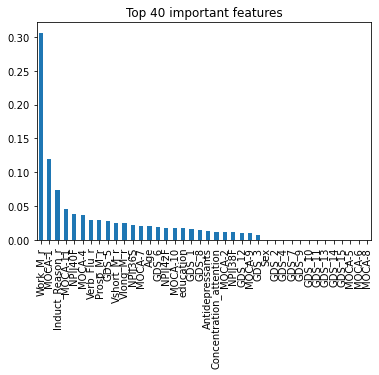

In [36]:
# Feature importance.

feat_importances = pd.Series(bestmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')
plt.title("Top 40 important features")
plt.show()

<font size=8>ΟVO and OVA (or OVR)</font>

Many algorithms, such as Logistic Regression, decision trees, and SVM, are inherently binary classifiers. In cases where we have more than two response classes (multi-class), and we seek predictions for a single class (rather than multiple, as in the multi-label problem), these algorithms require modification to operate effectively. To address this, combinatorial methods have been developed. These methods utilize binary classification procedures to design multiple classifiers using ensemble classification techniques.

### 1.OVR:

The One-Versus-Rest (OvR) or One-Versus-All (OVA) technique produces k binary classifiers when there are k classes in the target variable. For an observation x (input value) and classes C₁, ..., Cₖ, k binary models (hypotheses) are created with the following output values:

* hi(x) = +1, if x ∈ Ci

* hi(x) = -1, otherwise 

This approach involves training k classifiers, with each one deciding based on the rule of  "one class compared to the sum of the others".

For instance, consider a dataset with a total of 1000 examples of fruits divided into four different classes: 500 examples of 'apple,' 300 of 'pear,' 100 of 'tangerine,' and 100 of 'banana.' The goal is to predict the correct class among these four. To achieve this, k classifiers (here k=4) are created for the following binary classification problems:

Classifier No.1: {apple} vs {pear, tangerine, banana}

Classifier No.2: {pear} vs {apple, tangerine, banana}

Classifier No.3: {tangerine} vs {pear, apple, banana}

Classifier No.4: {banana} vs {pear, apple, tangerine}

The initial training set is modified k times to reflect the true values of the response variable. For the training of each classifier, a value of +1 is assigned to 'positive' classes with single elements, while a value of -1 is assigned to 'negative' heterogeneous classes with multiplicity greater than or equal to 2.

The training is conducted using standard binary classification techniques, and the final prediction is based solely on those models that predict the 'positive' class (an individual class rather than a combination). From these models, the result with the highest probability (confidence score) is selected.

If only one classifier predicts the 'positive' class, it is selected without comparing probabilities.

To test performance on new, unseen data, the same process is applied to each instance in the test dataset as was done during model construction. If the accuracy meets expectations, the model can be relied upon for making predictions.

### 2.OVO:

One-Versus-One (OVO), in a multi-class problem, decomposes into k(k-1)/2 binary class optimization problems, creating all possible combinations between the different classes. Each training set consists of one class to predict against one (and only one) other class, resulting in k times 2 combinations (C(k,2)) for each classifier.

In this approach, a 'negative' class is not a combined class for which we are uncertain about the algorithm's prediction; instead, it is a class with a clear negative sign and a distinct outcome. For example, in a problem with 4 classes, the combinations would be as follows:

Classifier No.1: {apple} vs {pear}

Classifier No.2: {apple} vs {tangerine}

Classifier No.3: {apple} vs {banana}

Classifier No.4: {pear} vs {banana}

Classifier No.5: {pear} vs {tangerine}

Classifier No.6: {tangerine} vs {banana}

The final prediction is determined by a majority decision. Initially, +1 values are assigned to the classes on the left column and -1 for those on the right. For instance, if we receive the following predictions from these classifiers:

No.1 → +1 (apple)

No.2 → +1 (apple)

No.3 → -1 (banana)

No.4 → -1 (banana)

No.5 → -1 (tangerine)

No.6 → -1 (banana)

In this scenario, since most predictions are 'negative,' we determine which 'negative' class prevails. In this case, the 'banana' class would be the final prediction.



In [46]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [47]:
# Training ОVO algorithm with the default hyperparameters of the decision tree.

dec1= OneVsOneClassifier(DecisionTreeClassifier(random_state=4))

dec1.fit(X_train, Y_train)
y_pred = dec1.predict(X_test)


print('Precision-micro of OvO Classifier: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Recall-micro of OvO Classifier: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('f1-micro of OvO Classifier: {:.2f}'.format(f1_score(Y_test, y_pred, average='micro')))


Precision-micro of OvO Classifier: 0.68
Recall-micro of OvO Classifier: 0.68
f1-micro of OvO Classifier: 0.68


In [48]:
# Overfitting! (sad...also expected due to the lowest test scoring provided above.)

dec1.score(X_train,Y_train)

1.0

In [49]:
# Training ОVO algorithm with nested cv.
# Tuning hyperparameters with the OVO and OVR classifiers the 'estimator__' prefix is used for each hyperparameter we check.

clf=OneVsOneClassifier(DecisionTreeClassifier(random_state=6))
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['estimator__ccp_alpha']=[0.012, 0.013, 0.014, 0.018, 0.02]
space['estimator__max_features']=[5, 6, 7, 8, 9, 'sqrt']
space['estimator__criterion']=['gini','entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
nested_scores

array([0.64285714, 0.63095238, 0.68674699, 0.56626506, 0.60240964,
       0.75903614, 0.71084337, 0.74698795, 0.6626506 , 0.69879518])

In [50]:
nested_scores.mean()

0.670754446356856

In [51]:
bestmodel_ovo=search.best_estimator_
bestmodel_ovo

OneVsOneClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.012,
                                                    criterion='entropy',
                                                    max_features=5,
                                                    random_state=6))

In [52]:
# Training ОVR algorithm with the default hyperparameters of the decision tree.

dec2= OneVsRestClassifier(DecisionTreeClassifier(random_state=4))
dec2.fit(X_train, Y_train)

y_pred = dec2.predict(X_test)

print('Precision-micro of OvR Classifier: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Recall-micro of OvR Classifier: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('f1-micro of OvR Classifier: {:.2f}'.format(f1_score(Y_test, y_pred, average='micro')))

Precision-micro of OvR Classifier: 0.62
Recall-micro of OvR Classifier: 0.62
f1-micro of OvR Classifier: 0.62


In [53]:
dec2.score(X_train,Y_train)

1.0

In [54]:
len(dec1.estimators_)

6

In [55]:
# Training ОVR algorithm with nested cv.

clf=OneVsRestClassifier(DecisionTreeClassifier(random_state=6))
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['estimator__ccp_alpha']=[0.012, 0.013, 0.014, 0.018, 0.02]
space['estimator__max_features']=[5, 6, 7, 8, 9, 'sqrt']
space['estimator__criterion']=['gini','entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
nested_scores

array([0.71428571, 0.75      , 0.59036145, 0.60240964, 0.60240964,
       0.62650602, 0.6746988 , 0.65060241, 0.75903614, 0.65060241])

In [56]:
nested_scores.mean()

0.6620912220309811

In [57]:
bestmodel_ovr=search.best_estimator_
bestmodel_ovr

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.012,
                                                     criterion='entropy',
                                                     max_features=9,
                                                     random_state=6))

In [58]:
bestmodel_ovr.predict(X_test)

array([1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 3, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0,
       0, 1, 3, 0, 0, 3, 1, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 3, 2, 3, 1, 1, 3, 1, 0, 2, 1, 0, 3, 1, 2, 0,
       0, 0, 2, 0, 2, 1, 1, 2, 0, 3, 2, 2, 1, 1, 3, 3, 3, 3, 2, 3, 3, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 2, 0, 2, 2,
       2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 2, 3, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 1, 1, 3, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 0, 2, 2, 1,
       0, 3, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 0, 3, 3, 0, 0, 0, 2, 1, 2, 2,
       2, 1, 0, 3, 0, 2, 0, 2, 3, 1, 0, 0, 1, 3, 0, 1, 2, 3, 2, 1, 0, 1,
       2, 0, 3, 2, 1, 3, 0, 0, 0, 3, 0, 3, 0, 3, 1, 1, 2, 2, 2, 0, 3, 0,
       2, 0, 2, 1, 3, 2, 3, 2, 0, 0, 3, 3, 1, 0, 3, 0, 1, 0, 2, 1, 0, 0,
       2, 3, 3, 0, 0, 0, 3, 3], dtype=int64)

In [59]:
# Making predictions (for the 3nd observation of test set) .

out=bestmodel_ovr.predict(X_test)
out[2]

0

<font size=10>LIME and SHAP: Interpretability methods</font>

### To be considered reliable, a machine learning model must make accurate predictions, be stable, and allow for easy interpretation. It is well-known that black box models lack mechanistic and causal explanations. Various interpretability techniques like LIME and SHAP, exist to interpret complex machine learning models.

<font size=8><font color='teal'>LIME</font></font>

Model-agnostic techniques assess how input variables impact output variables without needing to understand the model's internal workings. These methods can be applied to any model, making them flexible for comparing interpretability across different models trained on the same dataset. **LIME (Local Interpretable Model-Agnostic Explanations)** is one such method that offers 'post-interpretation.' It can be applied to both inherently interpretable models (e.g., decision trees with few branches or logistic regression with few variables) and black box models (e.g., ANN, ensemble methods). LIME interprets individual instances (**local explanations**) by creating surrogate models, approximating the black box model's predictions at specific points of interest. It constructs a new dataset, weights data points based on proximity, feeds them into the black box model, and trains a simple model for interpretation.

In [45]:
!pip install lime

In [46]:
import lime
from lime import lime_tabular

explainer=lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                           mode='classification',
                                           feature_names=X_train.columns.values,
                                            verbose=True,
                                           random_state=34)

In [ ]:
# Interpret and predict the 2nd observation (j=1) of the test set
# Default value for 'num_features=10', displaying the 10 most important variables. 
# If 'top_labels=2', we get the results for the two most important classes predicted, even though only one is actually predicted.
# If 'top_labels=1', only the class predicted by the model, i.e., the one with the highest probability, is displayed.

random_state=1
j=1
exp=explainer.explain_instance(data_row=X_test.iloc[j],
                              predict_fn=bestmodel.predict_proba,num_features=10, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

In [50]:
# Coefficients of the simplified model via the LIME method.

map1=exp.as_map()
map1

{0: [(56, 0.07904988776365425),
  (53, 0.038733640290825946),
  (20, 0.03707088726057831),
  (42, -0.03292641327032299),
  (21, 0.028712612315301384),
  (27, 0.023544587762406498),
  (10, -0.02219050397501891),
  (55, 0.022017167385848493),
  (26, 0.021434881276453887),
  (54, 0.020505208812088147)]}

In [51]:
type(map1)

dict

In [52]:
# True response value of the 2nd observation (of the test set).

Y_test.iloc[1]

0

In [53]:
# The bestmodel predicts that the 2nd observation of the test set is classified according to class "0" with probability 0.97 .
# We have an accurate forecast since the actual and the predicted value are identical.

out1=bestmodel.predict(X_test)
out1[1]


0

In [54]:
# The predicted probabilities for the 2nd observation of the test set.

out2=bestmodel.predict_proba(X_test)
out2[1]

array([0.96703297, 0.03296703, 0.        , 0.        ])

In [1]:
# Alternatively (2nd way).

exp.predict_proba

NameError: name 'exp' is not defined

<font size=8><font color='crimson'>SHAP</font></font>

The term 'Shapley values' is derived from the work of mathematician and economist Lloyd Stowell Shapley, who extensively studied Game Theory. According to this theory, Shapley values are employed as a solution to a problem where each participant pursues their individual interests independently, yet cooperation is essential to maximize overall profits. In simpler terms, Shapley values aim to provide an unequal but fair distribution of profits to all contributors, achieving an optimal solution.

The Shapley value represents the expected marginal contribution of a factor across all possible combinations. In the context of machine learning, Shapley values illustrate how each feature (akin to a player in a game) impacts the prediction relative to the mean prediction, essentially quantifying the deviation of each prediction from the mean value.

Shapley values are founded on a robust mathematical framework, characterized by properties such as efficiency, symmetry, linearity, and absence of dummy players. These properties ensure reliability, even when approximations are required for computation. Shapley values also offer **global interpretability**, not limited to **local** interpretations.

However, Shapley values come with certain disadvantages. Firstly, they do not lead to the construction of predictive models like LIME does. Secondly, their high computational cost often makes it practically infeasible to calculate them. Another limitation is that Shapley values involve all features in their calculations, which can be problematic when seeking interpretation based on a subset of variables.

The **SHAP method (SHapley Additive exPlanations)** aims to address these weaknesses. It represents **Shapley values as components of an additive features model**, typically a linear model. This approach allows for the inclusion of selected variables, making it easier to interpret the contribution of specific variables to the final prediction.

In [56]:
!pip install shap

In [57]:
import shap
shap.initjs()

In [58]:
# Calculation of the shapley values through SHAP model for each observation of the test set (if we wanted to interpret an example of the training set we would have X_train as an argument).
# shap.TreeExplainer speeds up Shapley value calculations.

class_names = ['0', '1', '2', '3']
explainer=shap.TreeExplainer(bestmodel)
shap_values = explainer.shap_values(X_test)
shap_values

[array([[ 0.        ,  0.        ,  0.00912528, ...,  0.        ,
          0.17249746,  0.        ],
        [ 0.        ,  0.        ,  0.0015832 , ...,  0.        ,
          0.05735837,  0.        ],
        [ 0.        ,  0.        ,  0.00019267, ...,  0.        ,
         -0.00796969,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.0015832 , ...,  0.        ,
          0.05572016,  0.        ],
        [ 0.        ,  0.        , -0.02316418, ...,  0.        ,
          0.14561072,  0.        ],
        [ 0.        ,  0.        ,  0.00019267, ...,  0.        ,
         -0.007584  ,  0.        ]]),
 array([[-0.00862812,  0.        ,  0.05310643, ...,  0.00438559,
          0.18424524, -0.00181907],
        [ 0.00097473,  0.        ,  0.01236438, ...,  0.00879118,
          0.06196788, -0.00298008],
        [-0.0155412 ,  0.        ,  0.00227017, ...,  0.00886476,
         -0.00944582, -0.00144845],
        ...,
        [-0.00045432,  0.        ,  0.01236438, ...,  

In [59]:
shap.force_plot(explainer.expected_value[1],shap_values[1],X_test[0:])

In [60]:
X_test.iloc[1:2]

,Age,Sex,education,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
378,82,2,6.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0,0,0.0,0,0,0.0,0,1,3,1.0,3.0,0,0,0,0,0,0,1.0,3.0,0,0,0.0,0.0,0,0,1,6,8,10,16,2,5.0


In [61]:
X_test

,Age,Sex,education,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
28,70,2,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,5.000000,2.000000,0.000000,2.000000,1.000000,6.000000,0,0.000000,0,0,0.000000,0,1,4,1.000000,4.000000,0,0,0,0,0,0,1.000000,4.000000,0,0,1.000000,4.000000,1,4,0,4,5,3,6,2,5.000000
378,82,2,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,5.000000,6.000000,0,0.000000,0,0,0.000000,0,1,3,1.000000,3.000000,0,0,0,0,0,0,1.000000,3.000000,0,0,0.000000,0.000000,0,0,1,6,8,10,16,2,5.000000
432,65,2,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,3.000000,6.000000,0,0.000000,0,0,2.000000,4,2,3,2.000000,3.000000,0,0,0,0,0,0,2.000000,4.000000,0,0,0.000000,0.000000,0,0,0,5,6,12,15,1,5.000000
163,67,1,12.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,5.000000,6.000000,0,0.000000,0,0,0.000000,0,0,0,1.000000,3.000000,0,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0,4,3,8,25,6,5.000000
556,71,2,12.000000,0.812830,0.812830,0.812830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.812830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.812830,1.374341,2.000000,1.000000,0.812830,1.812830,0.000000,2.000000,0.812830,3.812830,0,0.000000,0,0,0.000000,0,0,3,0.812830,3.251318,0,3,0,0,0,0,0.812830,3.251318,0,0,0.000000,0.000000,0,0,0,1,1,4,8,0,0.812830
10,60,2,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,5.000000,3.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000,5.000000,5.000000,0,0.000000,0,0,0.000000,0,1,3,0.000000,0.000000,0,0,1,3,0,0,0.000000,0.000000,0,0,1.000000,3.000000,0,0,0,2,4,6,15,2,5.000000
301,53,2,18.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,6.000000,0,0.000000,0,0,0.000000,0,3,4,3.000000,4.000000,0,0,3,4,0,0,3.000000,4.000000,0,0,2.000000,4.000000,2,4,0,1,4,10,2,4,5.000000
628,57,2,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.672561,1.000000,1.000000,0.672561,0.327439,2.345122,2.000000,0.327439,0.000000,0.000000,0.672561,0.000000,1.327439,2.672561,4.000000,1,2.690244,1,3,1.345122,2,1,4,1.672561,4.000000,0,0,1,4,0,0,0.327439,1.309756,1,4,0.000000,0.000000,1,2,0,1,1,2,3,0,0.327439
388,79,1,12.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,5.000000,0,0.000000,0,0,1.000000,1,0,0,1.000000,4.000000,0,0,1,4,0,0,1.000000,3.000000,0,0,4.000000,4.000000,0,0,0,2,1,4,11,0,1.000000
656,81,1,6.000000,0.744824,0.744824,0.744824,0.000000,0.744824,0.000000,0.744824,0.000000,0.255176,0.000000,0.0

In [62]:
Y_test.iloc[1:2]

378    0
Name: diagnosis, dtype: int64

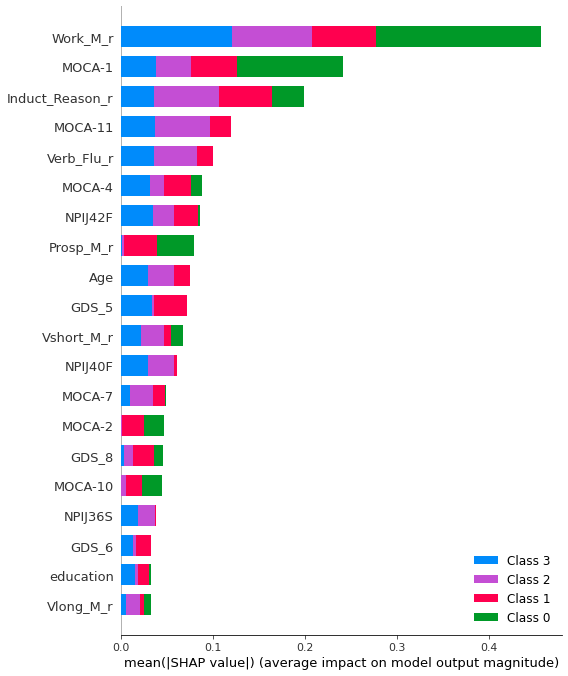

In [63]:
# Feature importance (grobal explanations).
# Apart from the classic feature importance we also have the effect of each variable and output class.

shap.summary_plot(shap_values[0:], X_test, plot_type="bar")

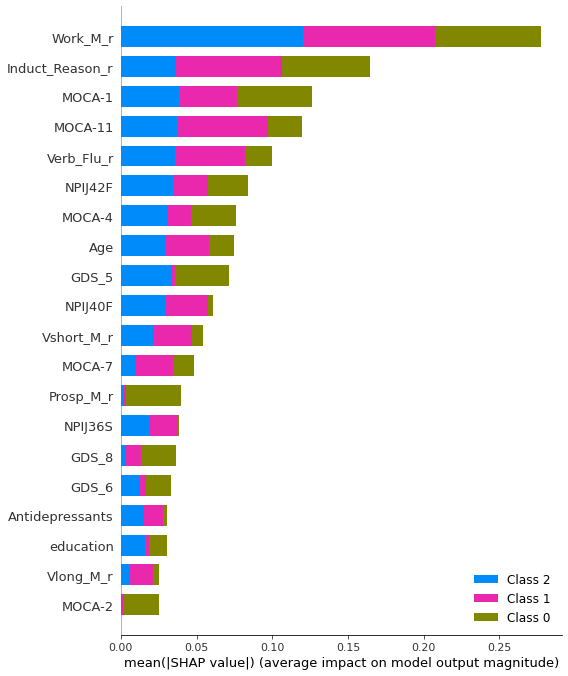

In [64]:
shap.summary_plot(shap_values[1:], X_test, plot_type="bar")

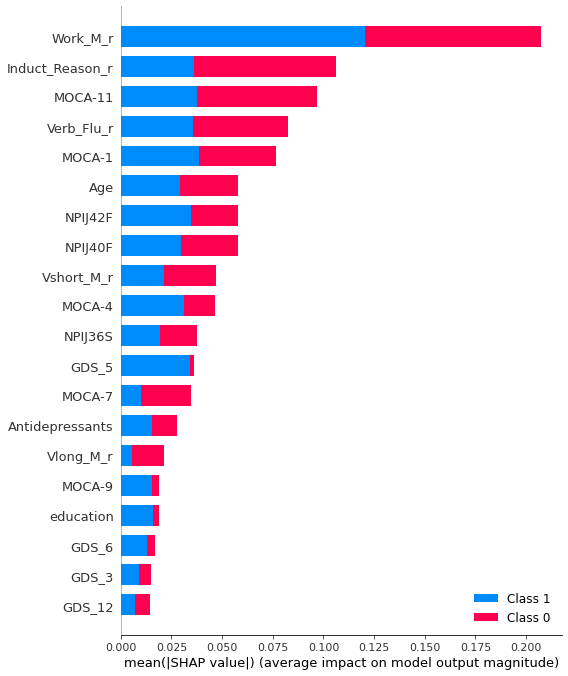

In [65]:
shap.summary_plot(shap_values[2:], X_test, plot_type="bar")

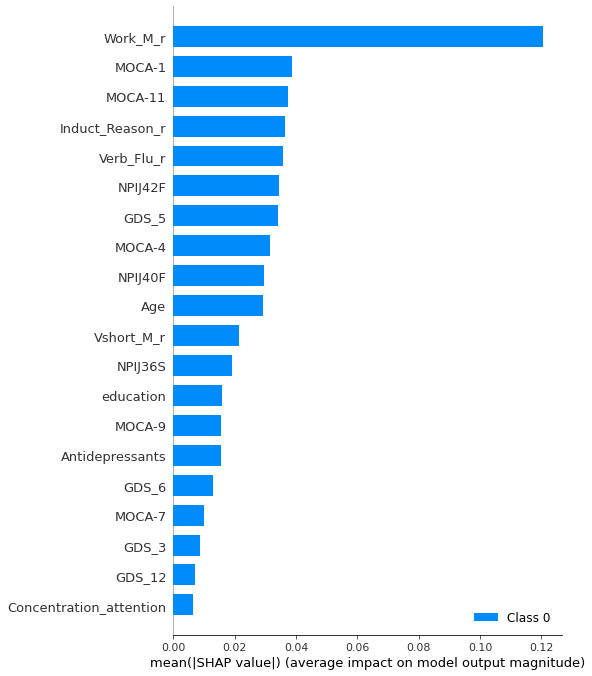

In [66]:
shap.summary_plot(shap_values[3:], X_test, plot_type="bar")

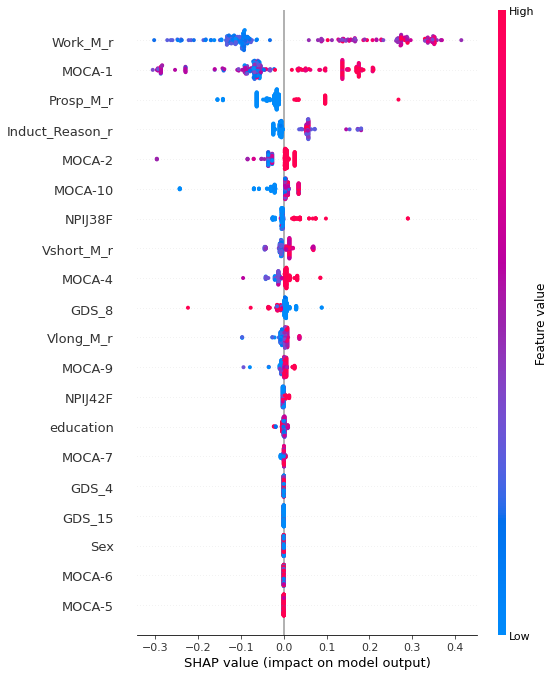

In [71]:
# Global explanations.
# Each of the points in the summary plot is the Shapley value of a feature/variable for a specific example/patient.
# Feature importance is determined by considering the effect of each variable or attribute based on their high or low values.
# Refers to class "0".

shap.summary_plot(shap_values[0], X_test.values, feature_names = X.columns)

In [110]:
# Local interpretation for the 2nd observation of the test set (actually it is the 378th observation of the original set X).

i=1
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X.columns)

In [111]:
len(X_test)

250

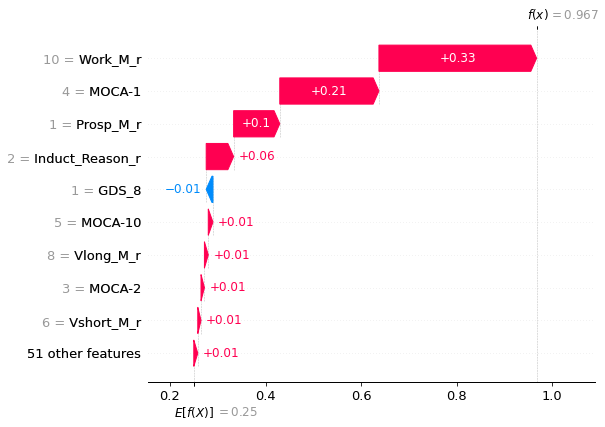

In [112]:
# Local interpretation for the 2nd observation of the test set (an alternative scheme and also the preferred one).

row =1
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [51]:
!pip install yellowbrick

In [52]:
from yellowbrick.model_selection import learning_curve

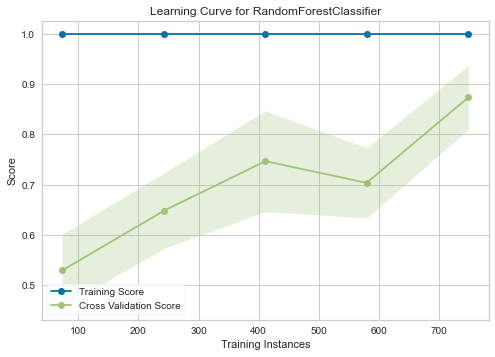

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [53]:



print(learning_curve(clf, X, Y, cv=10, scoring='accuracy'))

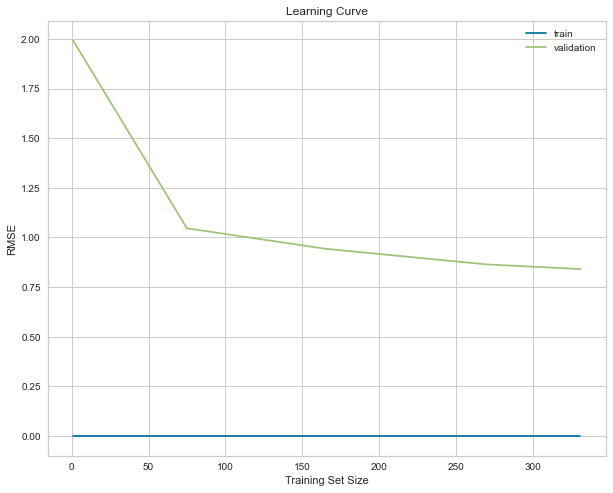

In [54]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# overfitting
decision_tree = DecisionTreeRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=decision_tree,
    X=X,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()